<a href="https://colab.research.google.com/github/neel26desai/dimensionality_reduction/blob/main/VariousTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons

In [ ]:
import seaborn as sns

# PCA

### On linear Data

Orignal Data Shape  (150, 4)
--------
Correlations between the Orignal columns
--------


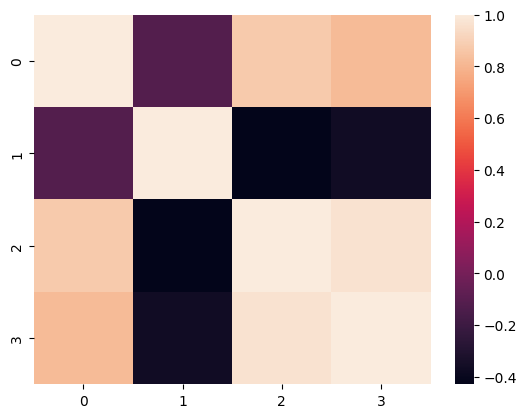

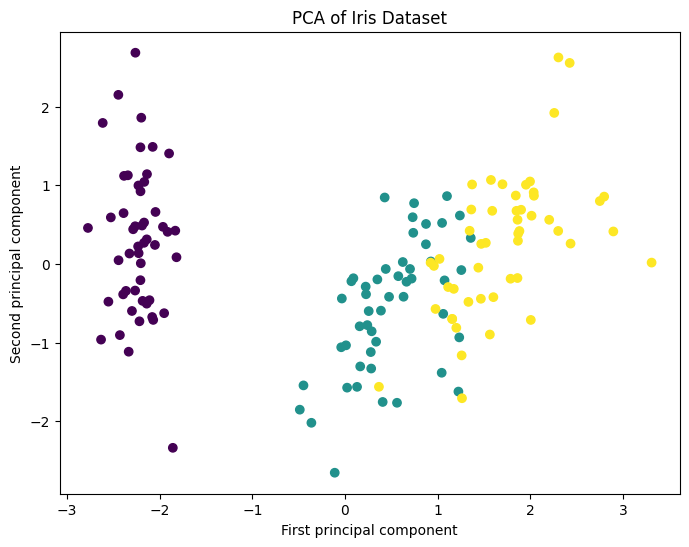

In [ ]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
print('Orignal Data Shape ', X_iris.shape)
# Standardize the data
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)
print('--------')
print('Correlations between the Orignal columns')

# Calculate the correlation matrix
# Calculate the row-wise mean of the correlation matrix
sns.heatmap(pd.DataFrame(X_scaled_iris).corr())
print('--------')
# Apply PCA
pca_iris = PCA(n_components=2)#converting to just 2 dimensions
X_pca_iris = pca_iris.fit_transform(X_scaled_iris)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_iris[:, 0], X_pca_iris[:, 1], c=y_iris)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Iris Dataset')
plt.show()


The 2D visualization of the PCA-transformed data revealed clear clusters corresponding to the different Iris species. This clustering suggests that PCA managed to retain the essential characteristics that distinguish between species. While PCA worked well for this particular dataset, it's important to note that its success partly depends on the linear relationships between features. PCA might not have been as effective if

## Non linear data

(300, 8)


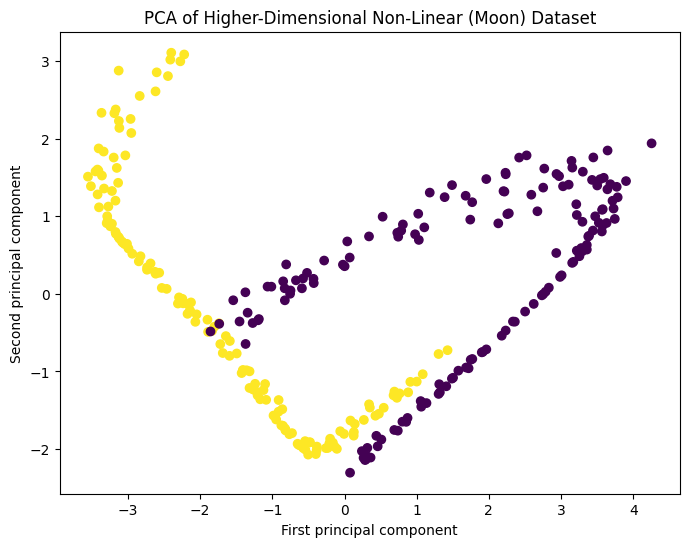

In [ ]:
# Generate non-linear data
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=0)

# Adding non-linear features
X_moons_higher_dim = np.hstack([X_moons, X_moons**2, np.sin(X_moons), np.cos(X_moons)])
print(X_moons_higher_dim.shape)

# Standardize the data
scaler = StandardScaler()
X_scaled_moons = scaler.fit_transform(X_moons_higher_dim)

# Apply PCA
pca_moons = PCA(n_components=2)
X_pca_moons = pca_moons.fit_transform(X_scaled_moons)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_moons[:, 0], X_pca_moons[:, 1], c=y_moons)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Higher-Dimensional Non-Linear (Moon) Dataset')
plt.show()

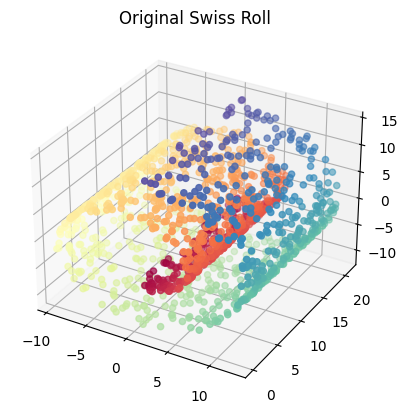

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss Roll data
X, color = make_swiss_roll(n_samples=1500)

# Visualizing the Swiss Roll
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll")
plt.show()


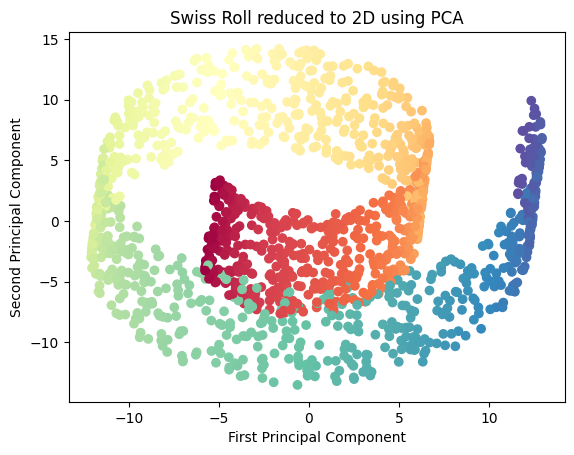

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Swiss Roll reduced to 2D using PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


In the resulting plot, you'll likely see that the PCA-reduced data loses the distinctive rolled structure of the original dataset. Instead, it'll probably appear more like a compressed, overlapping cluster of points. This demonstrates that PCA has failed to unravel the Swiss Roll and preserve its intrinsic geometry. This failure is due to PCA's linear nature, which cannot handle the complex, non-linear structure of the Swiss Roll.

## Kernel PCA for handling non linear data

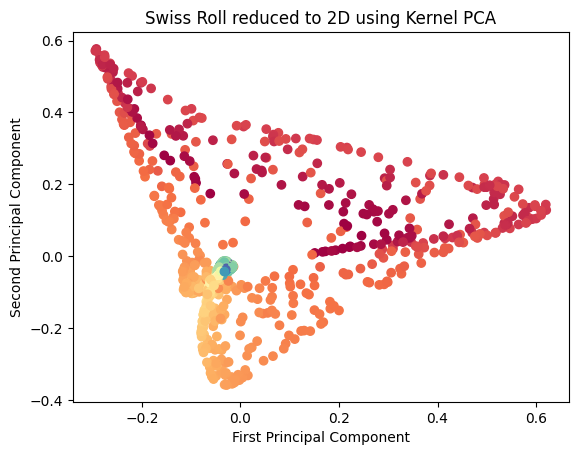

In [ ]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X)

# Plot the results
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Swiss Roll reduced to 2D using Kernel PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


Unlike linear PCA, which struggles with non-linear data and often results in incomprehensible projections, Kernel PCA provides a more meaningful reduction, preserving the dataset's inherent structure (in our case overlapping on Z axis).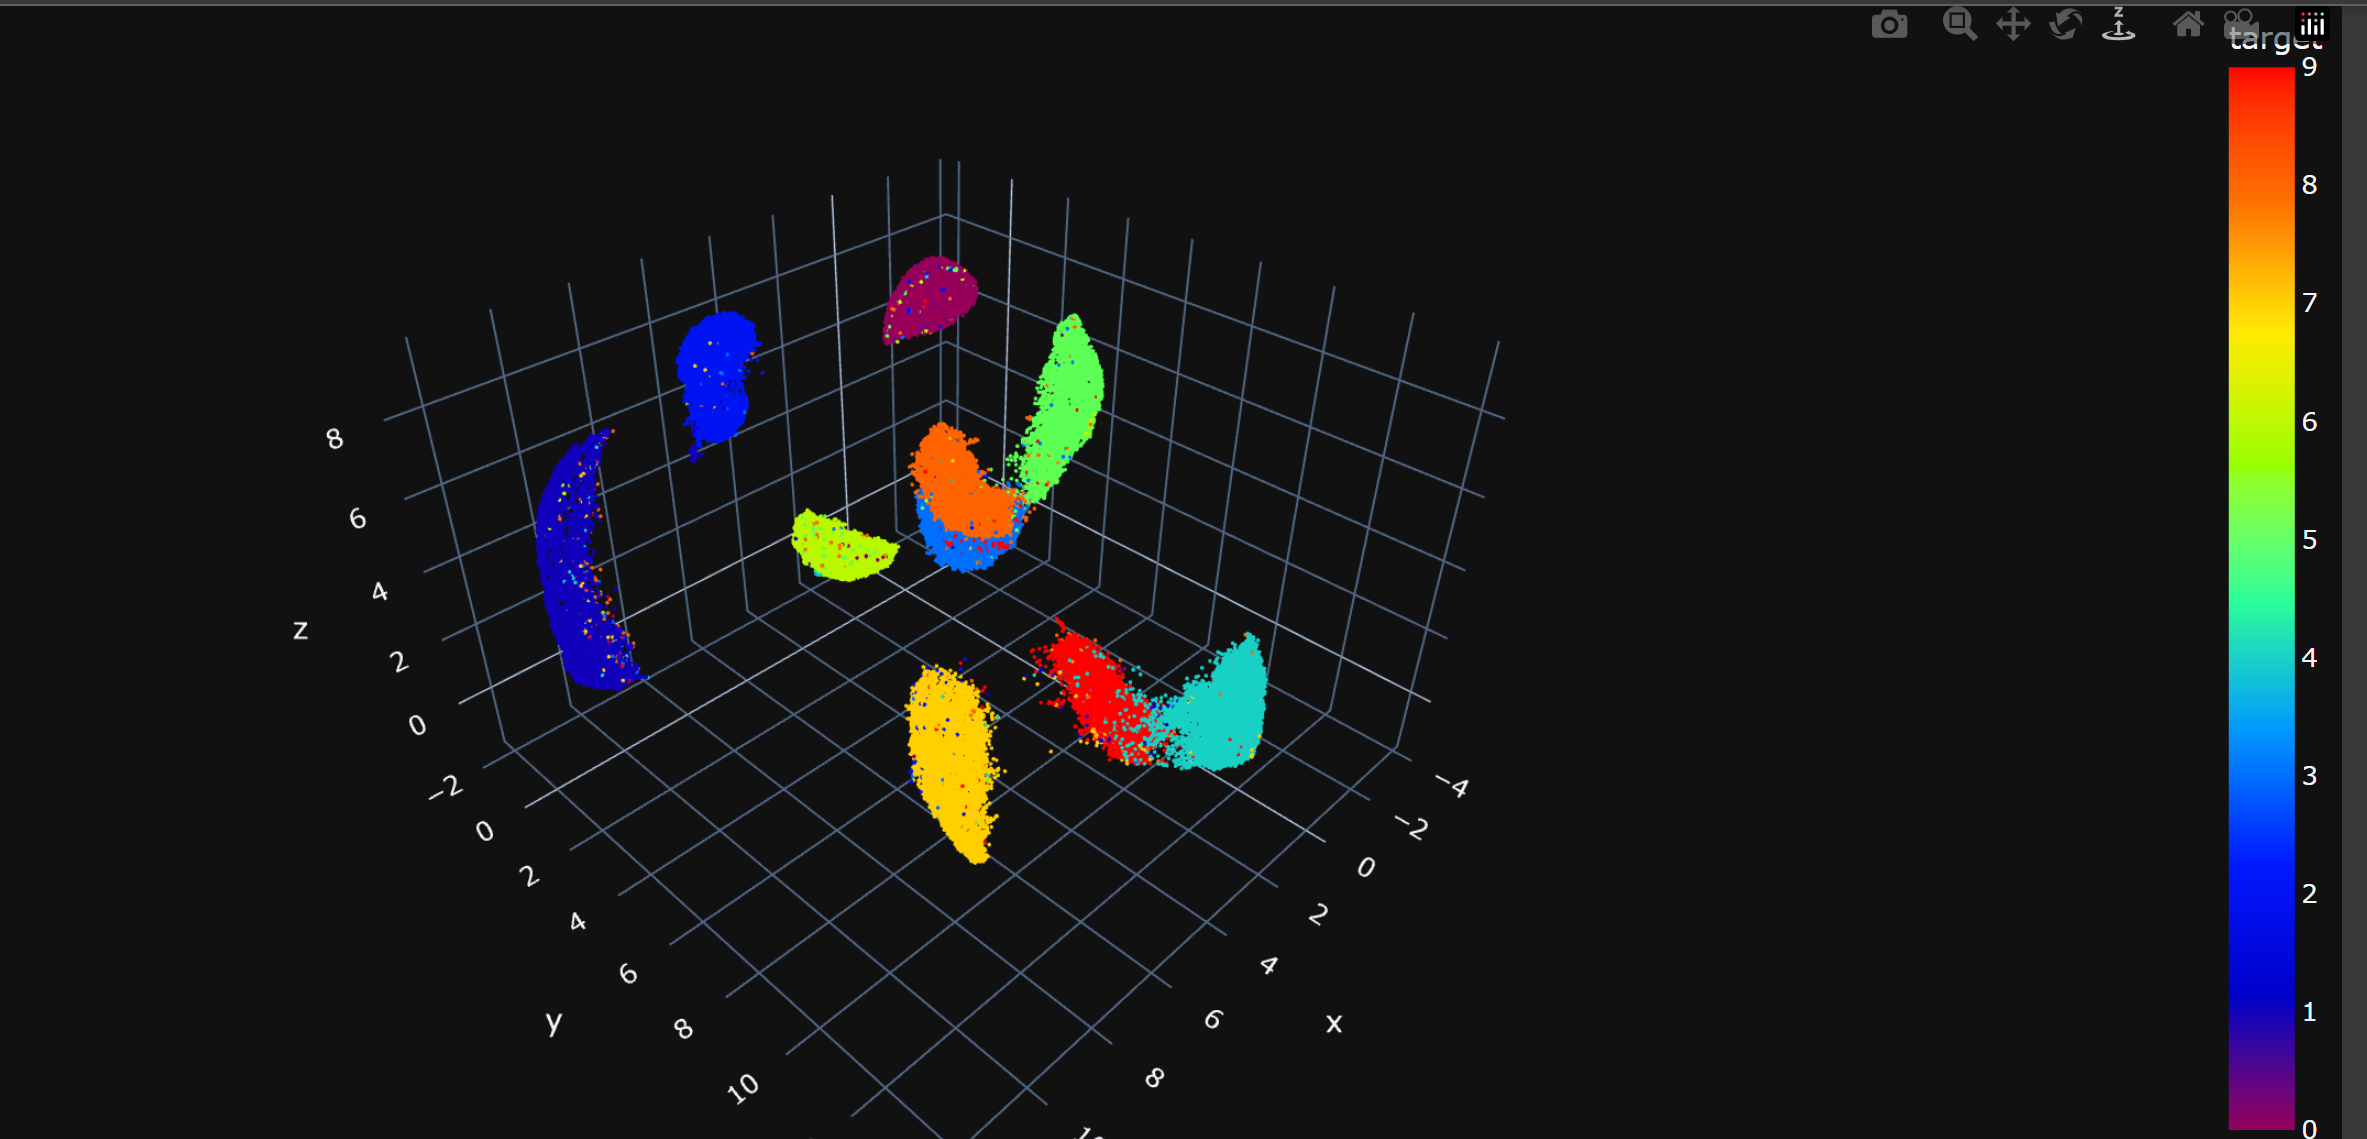

## Selecting the hyperparameter - Choosing the correct number for number of Components

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 154

In [ ]:
print(d)

154


In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
print(pca.n_components_)
print(pca.explained_variance_ratio_.sum())

154
0.9501960192613035


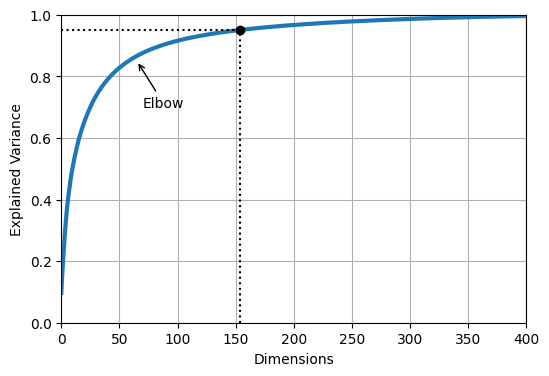

In [ ]:
# extra code – this cell generates and saves Figure 8–8

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [ ]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

# SVD

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [ ]:
# Datasets - You can replace these with datasets of your choice
# Dataset 1: Digits dataset (high-dimensional)
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Dataset 2: Wine dataset (real-world dataset)
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target


In [ ]:
# Preprocessing
# Standardizing the data is often necessary for dimensionality reduction techniques
scaler = StandardScaler()
X_digits_std = scaler.fit_transform(X_digits)
X_wine_std = scaler.fit_transform(X_wine)

In [ ]:
print('Orignal Shape of digits data', X_digits_std.shape)
print('Orignal Shape of Wine data', X_wine_std.shape)

Orignal Shape of digits data (1797, 64)
Orignal Shape of Wine data (178, 13)


In [ ]:
# Function to apply SVD and plot results
def apply_svd_and_plot(data, labels, title):
    svd = TruncatedSVD(n_components=2)
    data_reduced = svd.fit_transform(data)

    plt.figure()
    for i in np.unique(labels):
        plt.scatter(data_reduced[labels == i, 0], data_reduced[labels == i, 1], label=i)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

Applying SVD to Digits dataset...


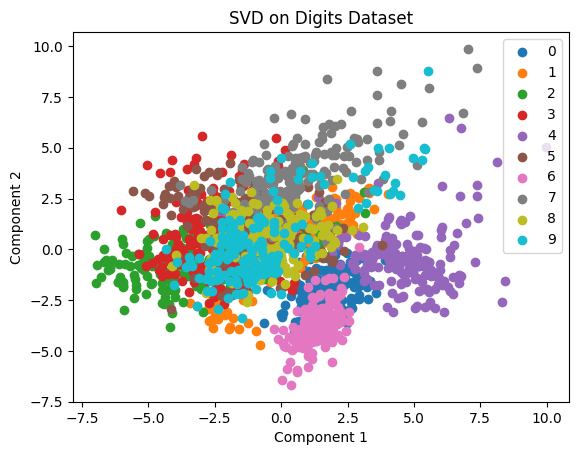

In [ ]:
# Apply SVD to Digits dataset
print("Applying SVD to Digits dataset...")
apply_svd_and_plot(X_digits_std, y_digits, "SVD on Digits Dataset")

Applying SVD to Wine dataset...


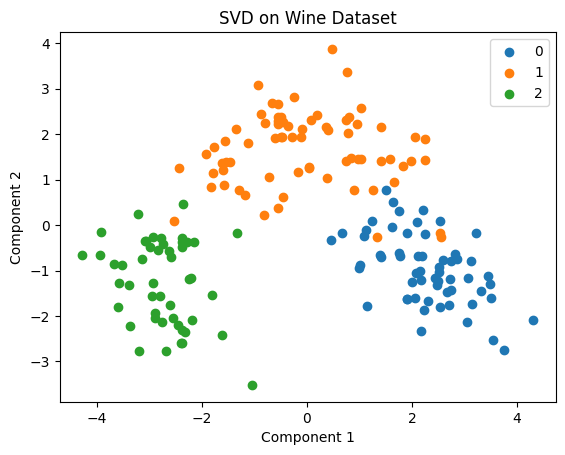

In [ ]:
# Apply SVD to Wine dataset
print("Applying SVD to Wine dataset...")
apply_svd_and_plot(X_wine_std, y_wine, "SVD on Wine Dataset")

Analysis:
1. SVD works well with the high-dimensional Digits dataset, showing clear separation between different digits.
2. For the Wine dataset, SVD provides a reasonable separation of classes, but some overlap is observed.
SVD is effective for dimensionality reduction in high-dimensional datasets and is useful for feature extraction and noise reduction. However, it may not be the best choice for datasets with non-linear relationships.

# MDS

Applying MDS to Digits dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


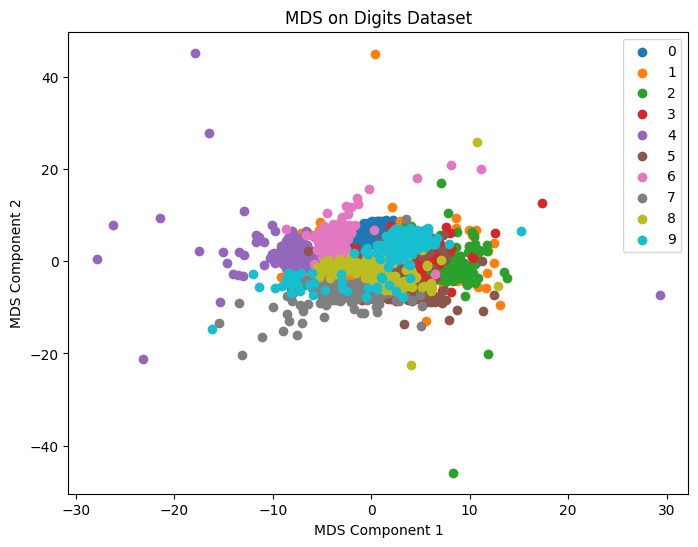

Applying MDS to Random dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


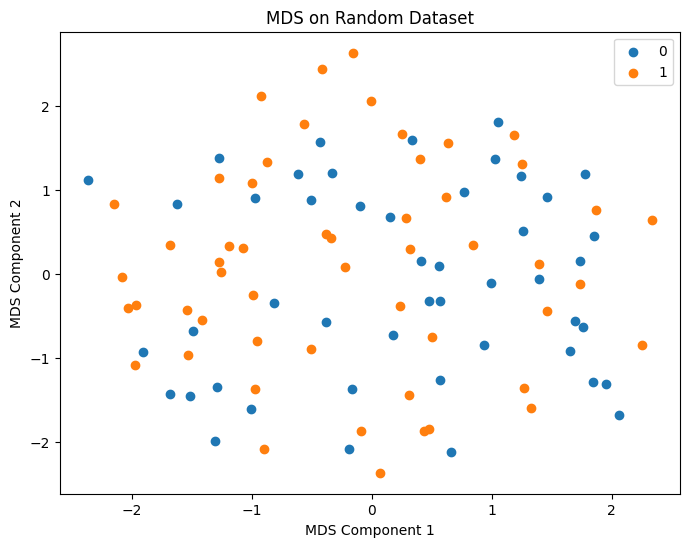

Analysis: 
1. MDS performs well on the Digits dataset, revealing underlying structures and clustering the digits effectively.
2. On the Random dataset, MDS fails to provide meaningful insights due to the inherent lack of structure or patterns in the data.


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler

# Load datasets
# Case where MDS is expected to perform well: Digits dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Case to demonstrate limitations of MDS: Random data
np.random.seed(0)
X_random = np.random.rand(100, 3)  # Generating random 3D data
y_random = np.random.randint(0, 2, 100)  # Random binary labels

# Standardize the data
scaler = StandardScaler()
X_digits_std = scaler.fit_transform(X_digits)
X_random_std = scaler.fit_transform(X_random)

# Function to apply MDS and plot results
def apply_mds_and_plot(data, labels, title):
    mds = MDS(n_components=2, random_state=1)
    data_transformed = mds.fit_transform(data)

    plt.figure(figsize=(8, 6))
    for i in np.unique(labels):
        plt.scatter(data_transformed[labels == i, 0], data_transformed[labels == i, 1], label=i)
    plt.title(title)
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.legend()
    plt.show()

# Apply MDS to Digits dataset
print("Applying MDS to Digits dataset...")
apply_mds_and_plot(X_digits_std, y_digits, "MDS on Digits Dataset")

# Apply MDS to Random dataset
print("Applying MDS to Random dataset...")
apply_mds_and_plot(X_random_std, y_random, "MDS on Random Dataset")

# Analysis of results
print("Analysis: ")
print("1. MDS performs well on the Digits dataset, revealing underlying structures and clustering the digits effectively.")
print("2. On the Random dataset, MDS fails to provide meaningful insights due to the inherent lack of structure or patterns in the data.")


Applying ISOMap to original Swiss Roll dataset...


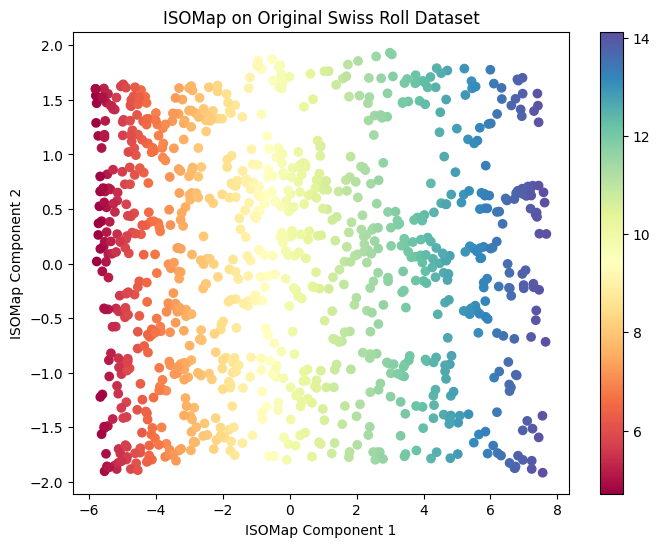

Applying ISOMap to noisy Swiss Roll dataset...


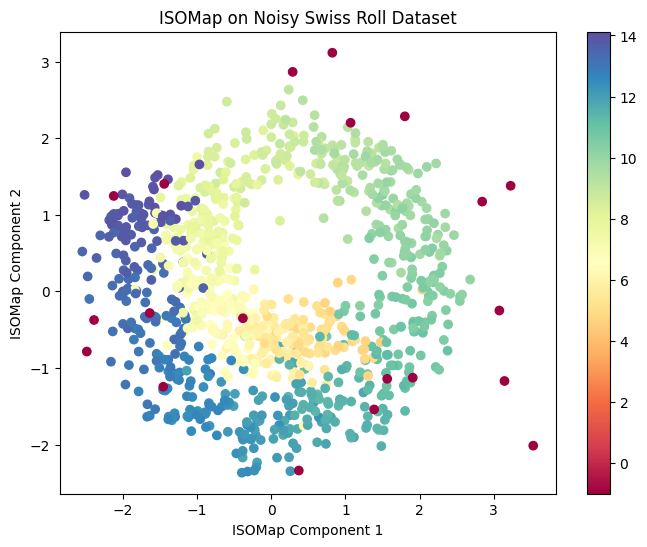

Analysis: 
1. ISOMap performs well on the original Swiss Roll dataset, effectively unfolding it in 2D.
2. The presence of noise and outliers in the second dataset significantly impacts the performance of ISOMap, distorting the manifold structure.


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

# Load the Swiss Roll dataset
X_swiss, y_swiss = datasets.make_swiss_roll(n_samples=1000, noise=0.1)

# Introduce noise and outliers
np.random.seed(0)
noise = np.random.normal(0, 2, X_swiss.shape)  # Adding Gaussian noise
outliers = np.random.uniform(low=-20, high=20, size=(20, 3))  # Creating random outliers
X_swiss_noisy = np.vstack([X_swiss + noise, outliers])  # Combining original data with noise and outliers
y_swiss_noisy = np.append(y_swiss, [-1 for _ in range(20)])  # Labeling outliers separately

# Standardize the data
scaler = StandardScaler()
X_swiss_std = scaler.fit_transform(X_swiss)
X_swiss_noisy_std = scaler.fit_transform(X_swiss_noisy)

# Function to apply ISOMap and plot results
def apply_isomap_and_plot(data, labels, title):
    isomap = Isomap(n_components=2, n_neighbors=10)
    data_transformed = isomap.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('ISOMap Component 1')
    plt.ylabel('ISOMap Component 2')
    plt.colorbar()
    plt.show()

# Apply ISOMap to original and noisy Swiss Roll datasets
print("Applying ISOMap to original Swiss Roll dataset...")
apply_isomap_and_plot(X_swiss_std, y_swiss, "ISOMap on Original Swiss Roll Dataset")

print("Applying ISOMap to noisy Swiss Roll dataset...")
apply_isomap_and_plot(X_swiss_noisy_std, y_swiss_noisy, "ISOMap on Noisy Swiss Roll Dataset")

# Analysis of results
print("Analysis: ")
print("1. ISOMap performs well on the original Swiss Roll dataset, effectively unfolding it in 2D.")
print("2. The presence of noise and outliers in the second dataset significantly impacts the performance of ISOMap, distorting the manifold structure.")


Analysis:
1. ISOMap performs well on the original Swiss Roll dataset, effectively unfolding it in 2D.
2. The presence of noise and outliers in the second dataset significantly impacts the performance of ISOMap, distorting the manifold structure.

# LLE

Applying LLE to Faces dataset...


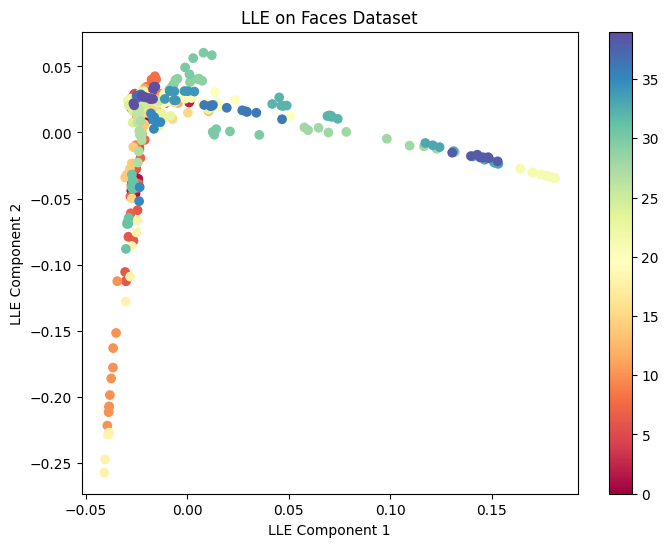

Time taken for LLE on Faces Dataset: 0.30 seconds
Applying LLE to a large random dataset...


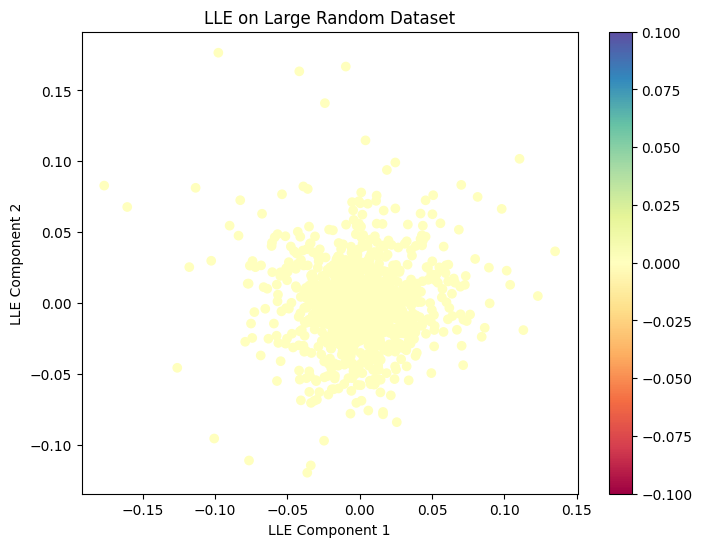

Time taken for LLE on Large Random Dataset: 0.88 seconds
Applying PCA to the large random dataset...


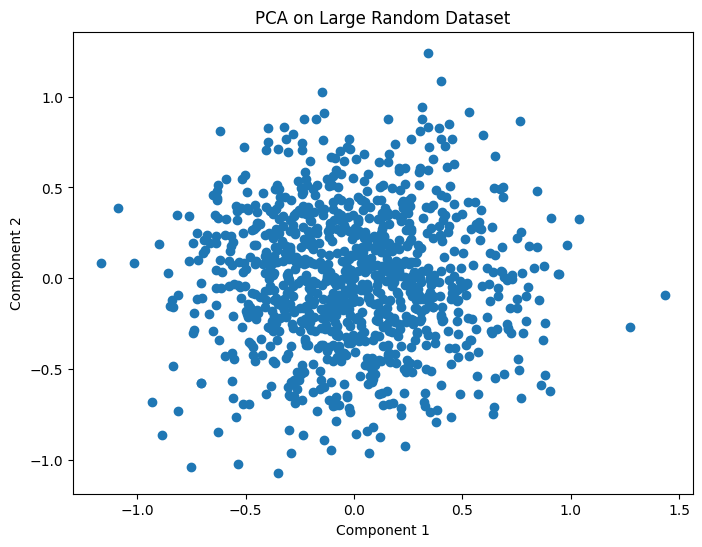

Time taken for PCA on Large Random Dataset: 0.05 seconds
2. Time taken by PCA: 0.05 seconds.
Analysis: 
1. LLE performs well on the Faces dataset, indicating its ability to capture the non-linear structures in the data.
2. The computation time for the large random dataset is significantly longer, demonstrating LLE's inefficiency with large datasets.


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import LocallyLinearEmbedding
from time import time

# Load datasets
# Faces dataset (non-linear structure)
faces = datasets.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target

# Large random dataset (to demonstrate computational inefficiency)
np.random.seed(0)
X_large = np.random.rand(1000, 100)  # Large dataset with 1000 samples, each with 100 features

# Function to apply LLE and plot results
def apply_lle_and_plot(data, labels, title, n_neighbors=10, n_components=2):
    start_time = time()
    lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    data_transformed = lle.fit_transform(data)
    end_time = time()

    plt.figure(figsize=(8, 6))
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('LLE Component 1')
    plt.ylabel('LLE Component 2')
    plt.colorbar()
    plt.show()

    print(f"Time taken for {title}: {end_time - start_time:.2f} seconds")
# Function to apply dimensionality reduction and plot results
def apply_and_time_reduction(method, data, title, **kwargs):
    start_time = time()
    transformed_data = method(**kwargs).fit_transform(data)
    end_time = time()

    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

    print(f"Time taken for {title}: {end_time - start_time:.2f} seconds")
    return end_time - start_time

# Apply LLE to Faces dataset
print("Applying LLE to Faces dataset...")
apply_lle_and_plot(X_faces, y_faces, "LLE on Faces Dataset")

# Apply LLE to large random dataset
print("Applying LLE to a large random dataset...")
apply_lle_and_plot(X_large, np.zeros(X_large.shape[0]), "LLE on Large Random Dataset")

# Apply PCA to the same dataset
print("Applying PCA to the large random dataset...")
time_pca = apply_and_time_reduction(PCA, X_large, "PCA on Large Random Dataset", n_components=2)
print(f"2. Time taken by PCA: {time_pca:.2f} seconds.")
# Analysis of results
print("Analysis: ")
print("1. LLE performs well on the Faces dataset, indicating its ability to capture the non-linear structures in the data.")
print("2. The computation time for the large random dataset is significantly longer, demonstrating LLE's inefficiency with large datasets.")


Analysis:
1. LLE performs well on the Faces dataset, indicating its ability to capture the non-linear structures in the data.
2. The computation time for the large random dataset is significantly longer, demonstrating LLE's inefficiency with large datasets.
3. PCA is significantly faster than LLE on large datasets, demonstrating its computational efficiency. However, PCA may not capture non-linear relationships as effectively as LLE.

# UMap

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Applying UMAP to MNIST dataset...


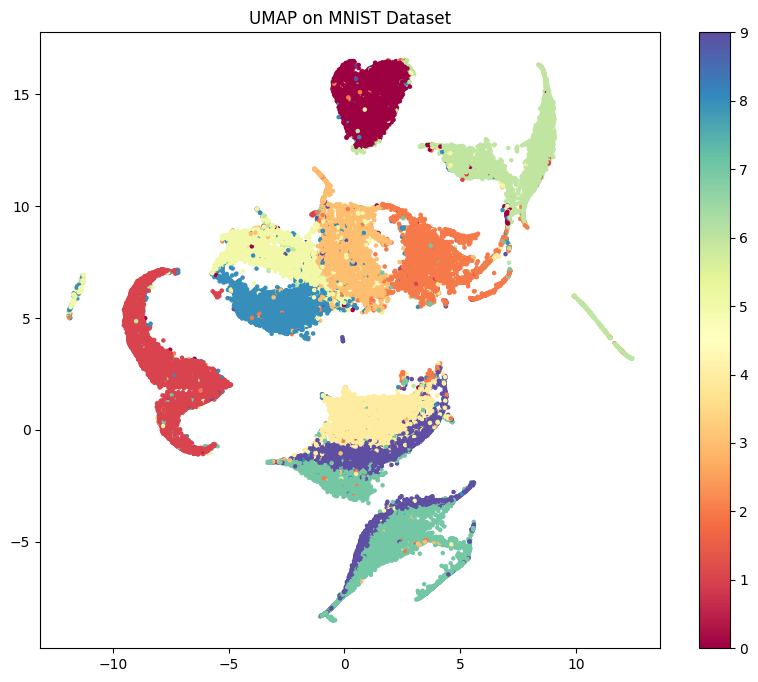

Applying UMAP to Overlapping dataset...


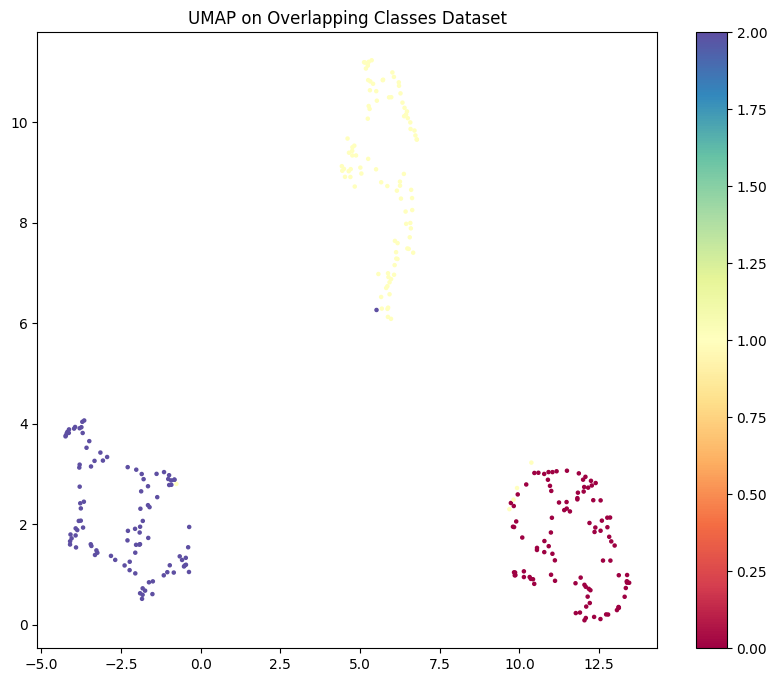

Analysis: 
1. UMAP performs well on the MNIST dataset, effectively separating different digit classes.
2. For the overlapping dataset, UMAP struggles to clearly separate the clusters due to the closeness of the classes.


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Load a well-separated dataset: MNIST
mnist = datasets.fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

# Create a synthetic dataset with overlapping classes
X_overlap, y_overlap = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
y_overlap = y_overlap.astype(int)

# Standardize the data
scaler = StandardScaler()
X_mnist_std = scaler.fit_transform(X_mnist)
X_overlap_std = scaler.fit_transform(X_overlap)

# Function to apply UMAP and plot results
def apply_umap_and_plot(data, labels, title):
    reducer = umap.UMAP()
    data_umap = reducer.fit_transform(data)

    plt.figure(figsize=(10, 8))
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='Spectral', s=5)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Apply UMAP to MNIST dataset
print("Applying UMAP to MNIST dataset...")
apply_umap_and_plot(X_mnist_std, y_mnist, "UMAP on MNIST Dataset")

# Apply UMAP to overlapping dataset
print("Applying UMAP to Overlapping dataset...")
apply_umap_and_plot(X_overlap_std, y_overlap, "UMAP on Overlapping Classes Dataset")

# Analysis of results
print("Analysis: ")
print("1. UMAP performs well on the MNIST dataset, effectively separating different digit classes.")
print("2. For the overlapping dataset, UMAP struggles to clearly separate the clusters due to the closeness of the classes.")


## UMAP  Visualizer

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [ ]:
!pip install imgcat

  Preparing metadata (setup.py) ... done
  Created wheel for imgcat: filename=imgcat-0.5.0-py3-none-any.whl size=10489 sha256=7dfacb60302db83b11e5dc5bb5ceb49ce0c0d0b6e5f5afcff9299d2c3abddf3d
  Stored in directory: /root/.cache/pip/wheels/c5/4a/4e/fb011ff4ce3231f23822d1332af25b664632bcb556c6907549
Successfully built imgcat


In [ ]:
embedding = umap.UMAP(n_neighbors=15,
                      min_dist=0.1,
                      metric='correlation').fit(X_mnist)



In [ ]:
import umap.plot

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

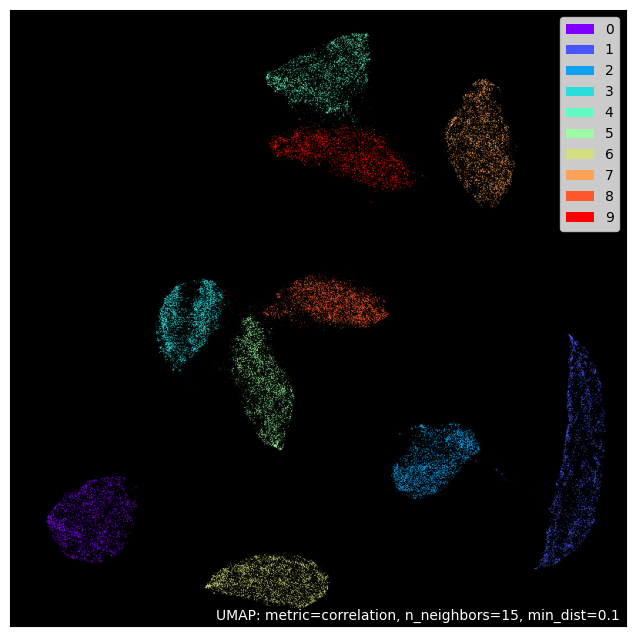

In [ ]:
umap.plot.points(embedding, labels=y_mnist, theme='fire')

In [6]:
import plotly.express as px

In [ ]:
embedding = umap.UMAP(n_neighbors=15,
                      min_dist=0.1,
                      metric='correlation',
                     n_components=3).fit(X_mnist)

In [ ]:
df = pd.DataFrame(embedding.transform(X_mnist), columns=['x', 'y', 'z'])
df['target'] = y_mnist



In [ ]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='target',
                   template='plotly_dark',
                   color_continuous_scale=px.colors.sequential.Rainbow)
# fig.show()
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=1)

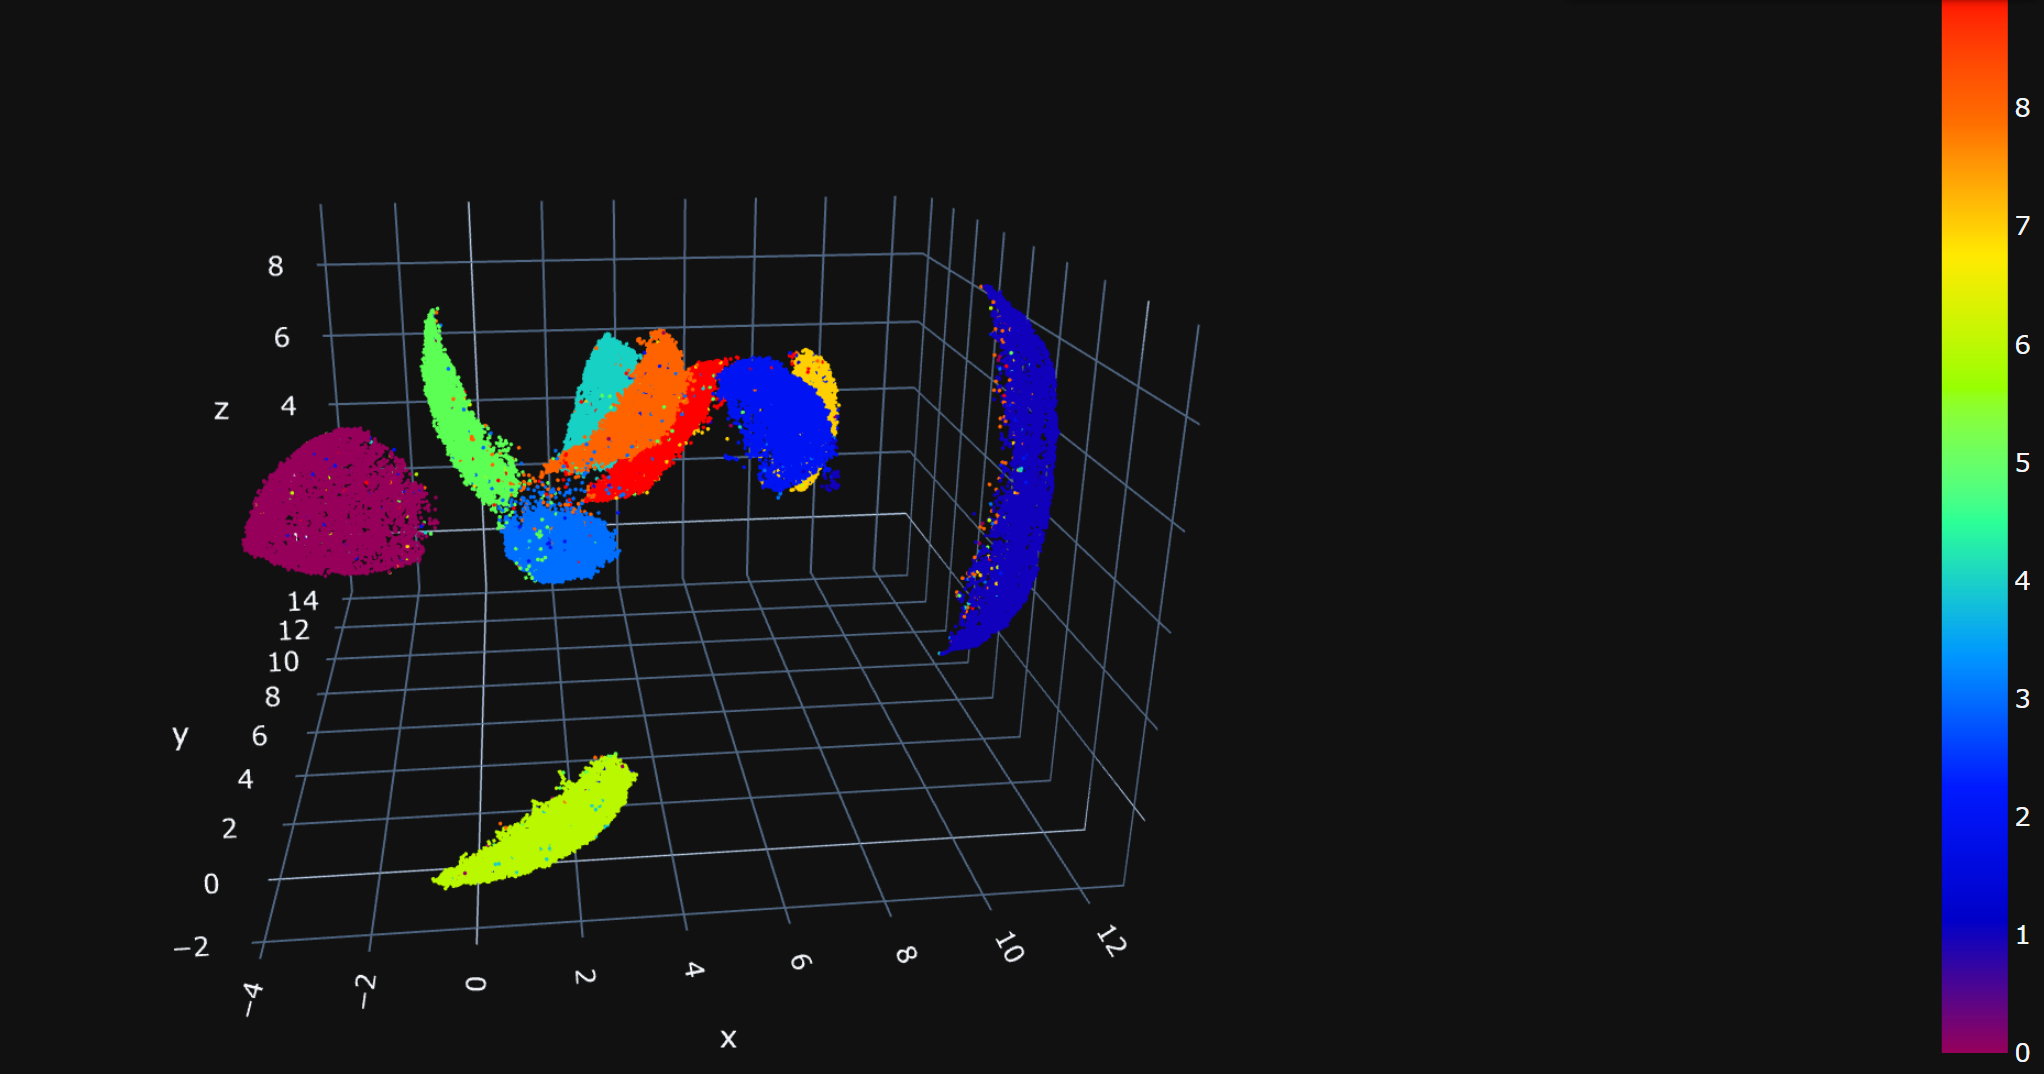

# T-SNE

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.model_selection import train_test_split

# Load Fashion MNIST dataset
fashion_mnist = datasets.fetch_openml('Fashion-MNIST', version=1)
X_fashion = fashion_mnist.data
y_fashion = fashion_mnist.target.astype(int)

# Sample a subset of the dataset
X_sample, _, y_sample, _ = train_test_split(X_fashion, y_fashion, test_size=0.9, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_sample_std = scaler.fit_transform(X_sample)




In [4]:
tsne = TSNE(n_components=2, random_state=0)
data_mnist = tsne.fit_transform(X_sample_std)

In [12]:
import pandas as pd

In [39]:
df = pd.DataFrame(data_mnist, columns=['x', 'y'])
df['target'] = y_sample.to_numpy()


In [40]:
fig = px.scatter(df,x='x', y='y', color ='target',color_continuous_scale=px.colors.sequential.Rainbow )
fig.show()

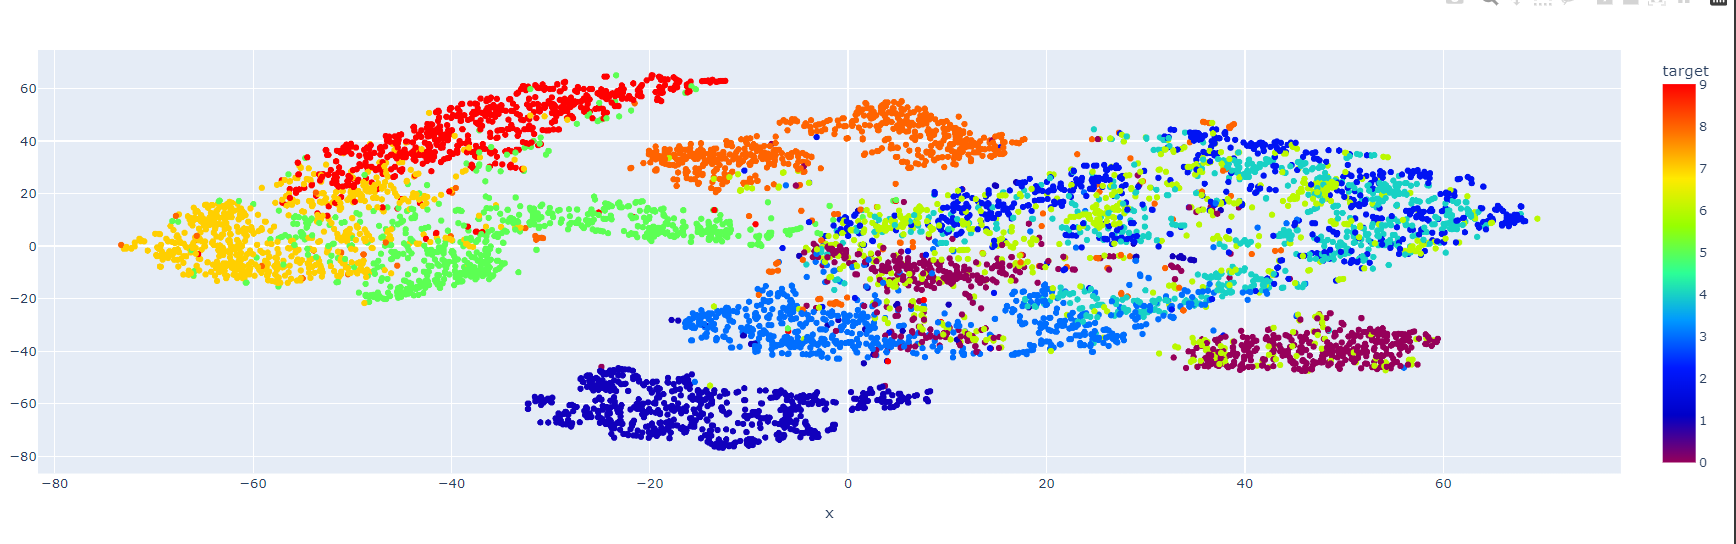

In [5]:
tsne = TSNE(n_components=3, random_state=0)
data_mnist3 = tsne.fit_transform(X_sample_std)

In [23]:
df = pd.DataFrame(data_mnist3, columns=['x', 'y','z'])
df['target'] = y_sample.to_numpy()


In [38]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='target',
                   template='plotly_dark',
                   color_continuous_scale=px.colors.sequential.Rainbow)
# fig.show()
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=1)

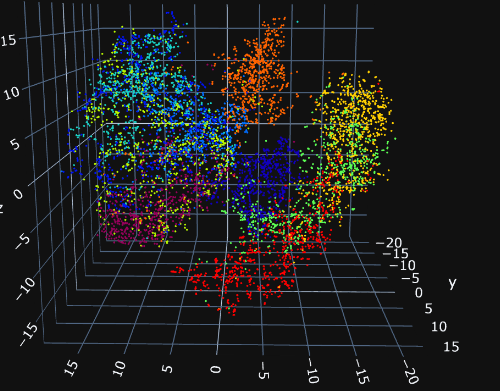

 t-SNE was able to effectively visualize the different fashion items, grouping similar types together. This demonstrates its strength in dealing with complex, high-dimensional data.